<a href="https://colab.research.google.com/github/vishnudk/HousingPriceWithskleran/blob/master/housingprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_csv("sample_data/california_housing_train.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [0]:
x_data=data.drop('median_house_value',axis=1)
y_data=data['median_house_value']

In [8]:
x_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


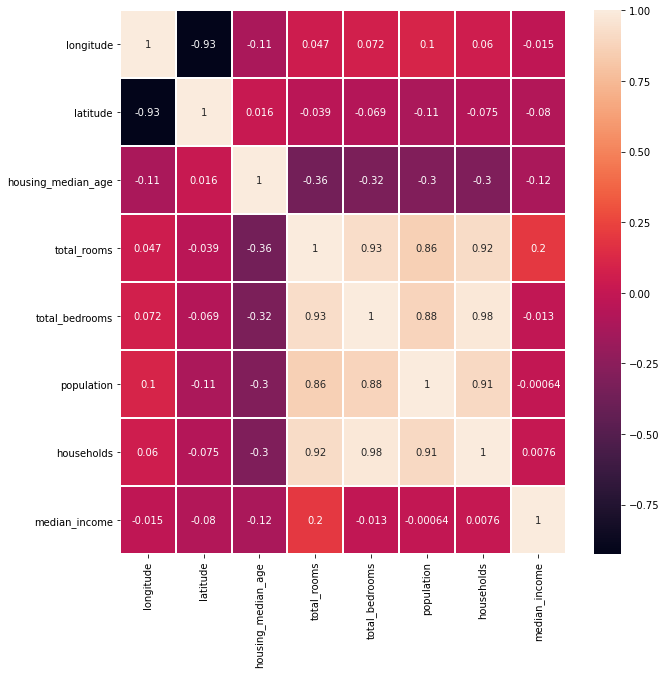

In [9]:
plt.subplots(figsize=(10,10))
corr=x_data.corr()
sn.heatmap(x_data.corr(), annot=True,linewidths=1)

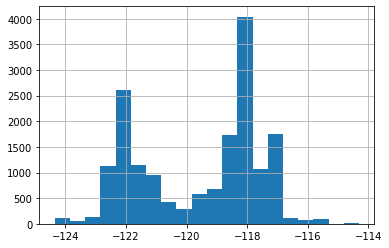

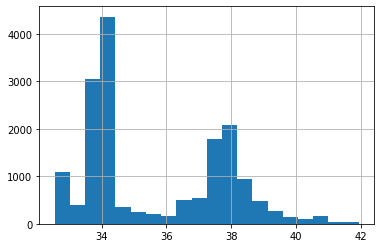

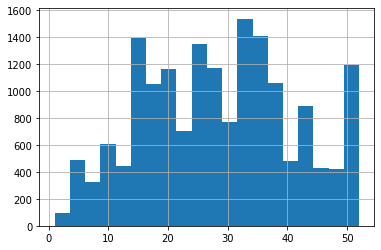

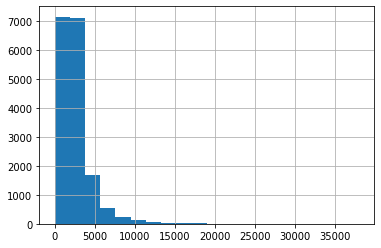

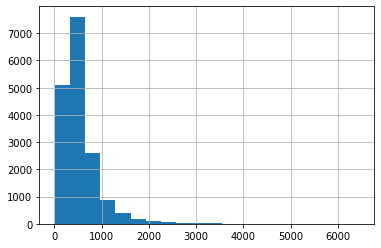

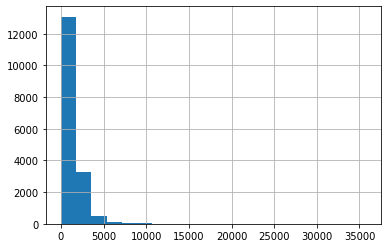

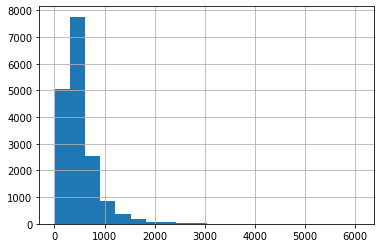

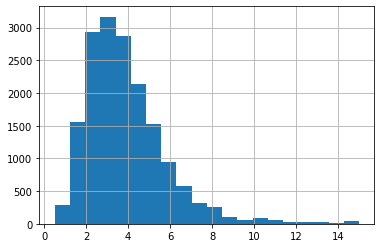

In [10]:

for name in x_data.columns:
  data[name].hist(bins=20)
  plt.show()

In [0]:
# x_data.columns

using p value to drop features

In [0]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = x_data.columns[columns]
x_data = x_data[selected_columns]

In [13]:
x_data.head()

,longitude,latitude,housing_median_age,total_rooms,population,median_income
0,-114.31,34.19,15.0,5612.0,1015.0,1.4936
1,-114.47,34.40,19.0,7650.0,1129.0,1.8200
2,-114.56,33.69,17.0,720.0,333.0,1.6509
3,-114.57,33.64,14.0,1501.0,515.0,3.1917
4,-114.57,33.57,20.0,1454.0,624.0,1.9250


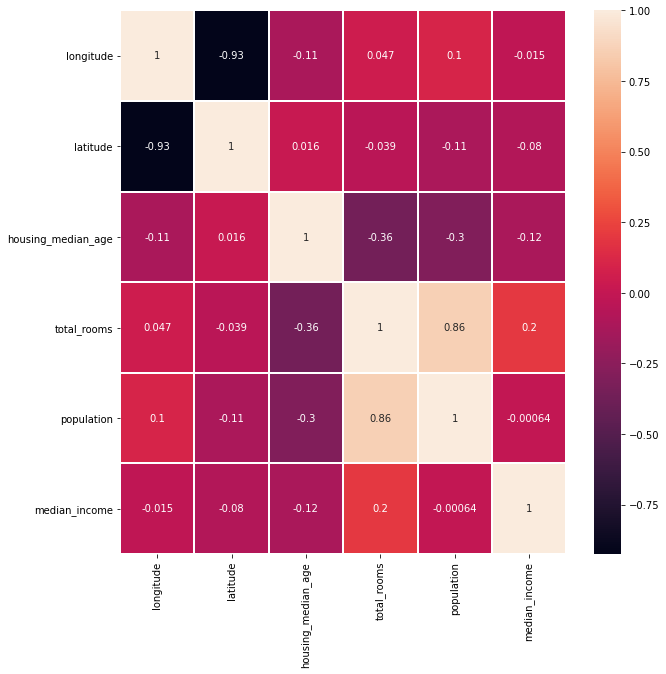

In [14]:
plt.subplots(figsize=(10,10))
corr=x_data.corr()
sn.heatmap(x_data.corr(), annot=True,linewidths=1)

In [0]:
inputs  = tf.random.normal(shape=[6])

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [17]:
x_data.head()

,longitude,latitude,housing_median_age,total_rooms,population,median_income
0,-114.31,34.19,15.0,5612.0,1015.0,1.4936
1,-114.47,34.40,19.0,7650.0,1129.0,1.8200
2,-114.56,33.69,17.0,720.0,333.0,1.6509
3,-114.57,33.64,14.0,1501.0,515.0,3.1917
4,-114.57,33.57,20.0,1454.0,624.0,1.9250


In [0]:
from sklearn.preprocessing import StandardScaler


In [88]:
scaler = StandardScaler()
print(scaler.fit(x_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [115]:

reg = LinearRegression(fit_intercept=True, normalize=True , copy_X=True, n_jobs=None).fit(x, y_data)
reg.score(x, y_data)

0.6413378529502686

In [0]:
x=scaler.fit(x_data)

In [117]:
x_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [0]:
x=x_data/x_data.mean()

In [114]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.956072,0.959713,0.524671,2.122811,2.378521,0.710002,0.941699,0.384594
1,0.957410,0.965608,0.664583,2.893711,3.524216,0.789746,0.923742,0.468640
2,0.958163,0.945678,0.594627,0.272349,0.322574,0.232937,0.233430,0.425098
3,0.958247,0.944275,0.489693,0.567773,0.624756,0.360247,0.450898,0.821845
4,0.958247,0.942310,0.699561,0.549994,0.604363,0.436494,0.522723,0.495677
